In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/most-subscribed-1000-youtube-channels/topSubscribed.csv


In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

# First look

In [3]:
df = pd.read_csv('/kaggle/input/most-subscribed-1000-youtube-channels/topSubscribed.csv')

In [4]:
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,"234,000,000","212,900,271,553","18,515",Music,2006
1,2,YouTube Movies,"161,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"152,000,000","149,084,178,448",846,Education,2006
3,4,SET India,"150,000,000","137,828,094,104","103,200",Shows,2006
4,5,MrBeast,"128,000,000","21,549,128,785",733,Entertainment,2012


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [6]:
print(f'We have {df.shape[0]} rows and {df.shape[1]} colums in dataset.')

We have 1000 rows and 7 colums in dataset.


# Data preparation

In [7]:
list = ['Subscribers', 'Video Views', 'Video Count']
for i in list:
    df[i] = df[i].str.replace(',', '')

In [8]:
for i in list:
    df[i] = df[i].astype('int64')

In [9]:
df.isna().sum() / len(df)

Rank               0.0
Youtube Channel    0.0
Subscribers        0.0
Video Views        0.0
Video Count        0.0
Category           0.0
Started            0.0
dtype: float64

In [10]:
df.describe()

,Rank,Subscribers,Video Views,Video Count,Started
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2.158140e+07,9.994912e+09,9416.228000,2012.594000
std,288.819436,1.662556e+07,1.300546e+10,32190.909114,4.110238
min,1.000000,1.140000e+07,0.000000e+00,0.000000,1970.000000
25%,250.750000,1.340000e+07,3.871470e+09,365.500000,2010.000000
50%,500.500000,1.660000e+07,6.723360e+09,896.000000,2013.000000
75%,750.250000,2.320000e+07,1.223052e+10,3277.250000,2015.000000
max,1000.000000,2.340000e+08,2.129003e+11,342802.000000,2021.000000


In [11]:
df = df[df['Video Views'] != 0]

In [12]:
df['Category'].unique()

array(['Music', 'Education', 'Shows', 'Entertainment', 'Gaming',
       'People & Blogs', 'Sports', 'Film & Animation', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels',
       'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

In [13]:
df[df['Category'] =='https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels'].head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
106,107,Vlad và Niki,33900000,21008932630,457,https://us.youtubers.me/global/all/top-1000-mo...,2018
166,167,व्लाद और निकिता,28700000,17107973877,478,https://us.youtubers.me/global/all/top-1000-mo...,2018
219,220,Super JoJo - Nursery Rhymes & Kids Songs,24400000,1459730,8,https://us.youtubers.me/global/all/top-1000-mo...,2019
220,221,D Billions,24400000,27800456761,590,https://us.youtubers.me/global/all/top-1000-mo...,2019
254,255,Diana and Roma ARA,23000000,10504290129,544,https://us.youtubers.me/global/all/top-1000-mo...,2019


In [14]:
df['Category'] = df['Category'].replace('https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels', 'Other')

In [15]:
df['Views_per_video'] = round(df['Video Views'] / df['Video Count'])

In [16]:
df['Category'].unique()

array(['Music', 'Education', 'Shows', 'Entertainment', 'Gaming',
       'People & Blogs', 'Sports', 'Film & Animation', 'Howto & Style',
       'News & Politics', 'Comedy', 'Trailers', 'Nonprofits & Activism',
       'Other', 'Science & Technology', 'Movies', 'Pets & Animals',
       'Autos & Vehicles', 'Travel & Events'], dtype=object)

# EDA

In [17]:
df_grouped = df.groupby('Category', as_index=False)\
[['Subscribers', 'Video Views', 'Video Count', 'Views_per_video']]\
.mean()

## Number of subscribers

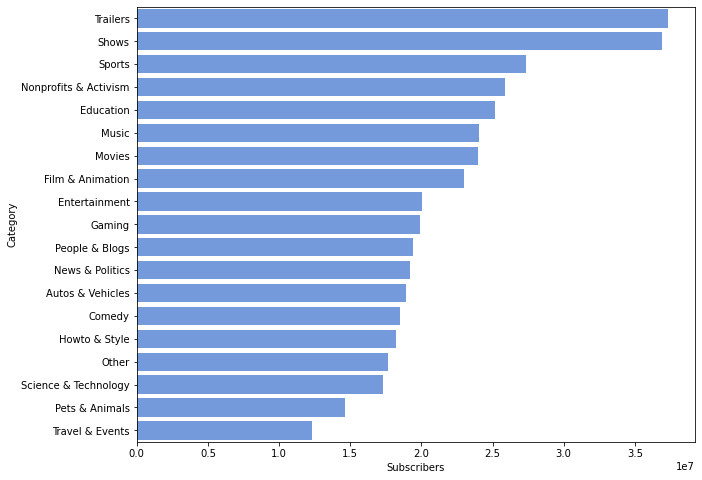

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_grouped['Subscribers'], y=df_grouped['Category'],color='cornflowerblue',
            order=df_grouped.sort_values('Subscribers', ascending=False).Category);

## Number of video views

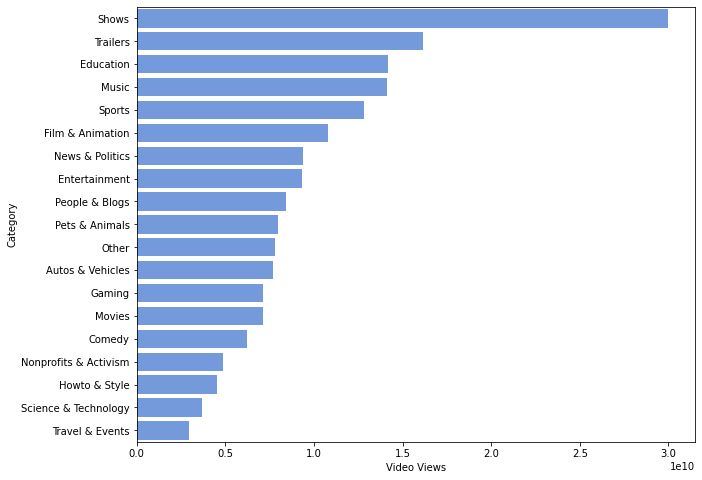

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_grouped['Video Views'], y=df_grouped['Category'],color='cornflowerblue',
            order=df_grouped.sort_values('Video Views', ascending=False).Category);

## Video count

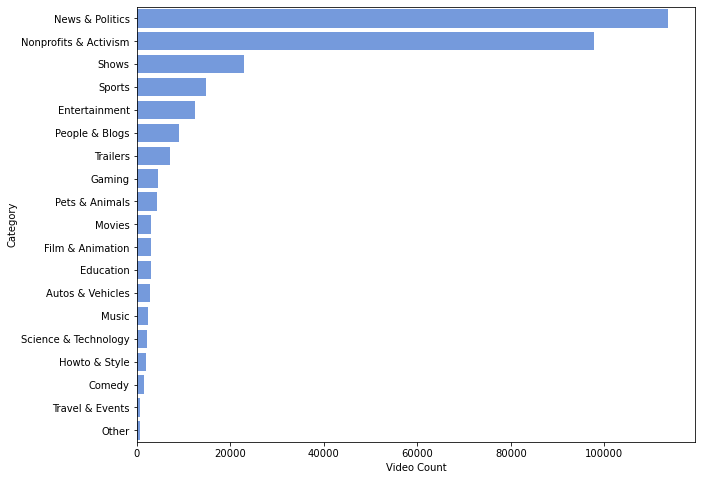

In [20]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_grouped['Video Count'], y=df_grouped['Category'],color='cornflowerblue',
            order=df_grouped.sort_values('Video Count', ascending=False).Category);

## Number of views per video

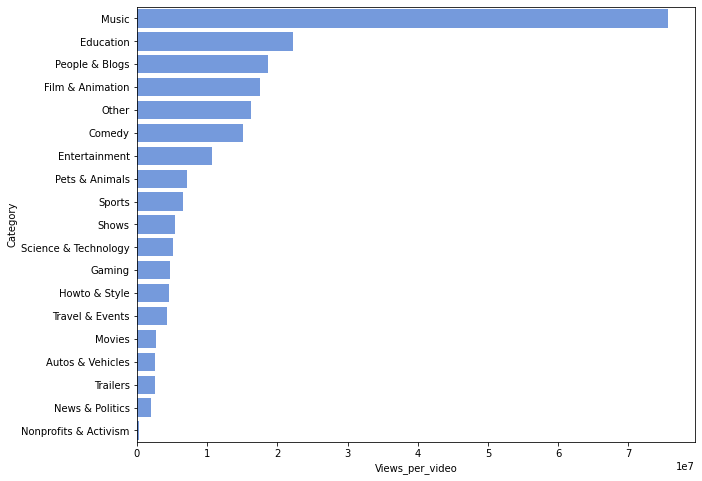

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_grouped['Views_per_video'], y=df_grouped['Category'],color='cornflowerblue',
            order=df_grouped.sort_values('Views_per_video', ascending=False).Category);

## Number of started Youtube chanels per year

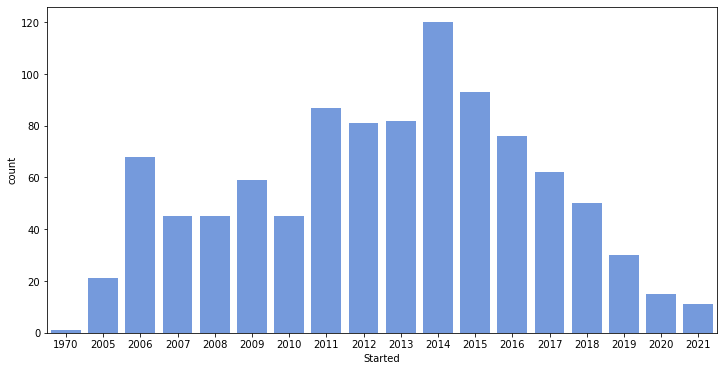

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x='Started', color='cornflowerblue');

## Correlation

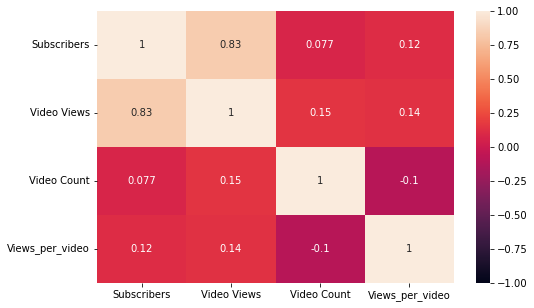

In [23]:
plt.figure(figsize=(8,5))
heatmap = sns.heatmap(df[['Subscribers', 'Video Views', 'Video Count', 'Views_per_video']].corr(),
                      vmin=-1, vmax=1, annot=True)

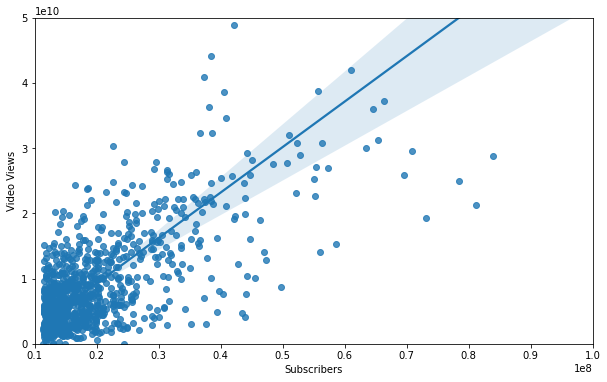

In [24]:
plt.figure(figsize=(10,6))
plt.ylim(0,50000000000)
plt.xlim(10000000,100000000)
sns.regplot(data=df, x='Subscribers', y='Video Views');